In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from nltk.tokenize import TweetTokenizer
from torch.utils.data import DataLoader

from models.MeTooDataset import MeTooDataset

In [2]:
experiment_name = '13A'

In [3]:
tokenizer = TweetTokenizer()

In [4]:
targets = ['Objectification of Women', 'Gender Equality', 'Conservatism']

In [5]:
labels = ['Against', 'Neutral', 'Favor']

In [6]:
profile_ids = [783214, 19568591, 25073877, 103018203, 256881576, 810619093749559296]

In [7]:
users = list('ABCDEF')

# Setup

In [8]:
dataset_obj = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='stance_testing',
    target='Objectification of Women'
)

In [9]:
dataloader_obj = DataLoader(dataset_obj)

In [10]:
dataset_gen = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='stance_testing',
    target='Gender Equality'
)

In [11]:
dataloader_gen = DataLoader(dataset_gen)

In [12]:
dataset_con = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='stance_testing',
    target='Conservatism'
)

In [13]:
dataloader_con = DataLoader(dataset_con)

# Stance Dictionary

In [14]:
stance_dict = {
    user_id: {
        'Objectification of Women': {
            stance: len(
                [
                    _tweet
                    for _, (_tweet, _stance, _user_id) in enumerate(dataloader_obj)
                    if _stance == stance and _user_id == user_id
                ]
            )
            for stance in set(dataset_obj.y)
        },
        'Gender Equality': {
            stance: len(
                [
                    _tweet
                    for _, (_tweet, _stance, _user_id) in enumerate(dataloader_gen)
                    if _stance == stance and _user_id == user_id
                ]
            )
            for stance in set(dataset_gen.y)
        },
        'Conservatism': {
            stance: len(
                [
                    _tweet
                    for _, (_tweet, _stance, _user_id) in enumerate(dataloader_con)
                    if _stance == stance and _user_id == user_id
                ]
            )
            for stance in set(dataset_con.y)
        }
    }
    for user_id in profile_ids
}

# Objectification of Women

In [15]:
df_obj = pd.DataFrame.from_dict(
    {
        user_id: {
            'Against': stance_dict[user_id]['Objectification of Women'][0],
            'Neutral': stance_dict[user_id]['Objectification of Women'][1],
            'Favor': stance_dict[user_id]['Objectification of Women'][2]
        }
        for user_id in profile_ids
    },
    orient='index'
)

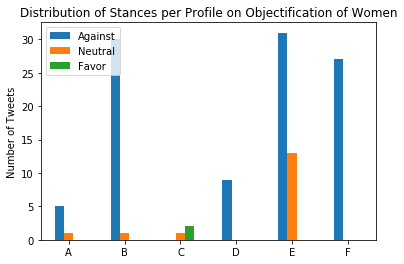

In [16]:
df_obj.plot(kind='bar', title='Distribution of Stances per Profile on Objectification of Women', rot=0)

plt.ylabel('Number of Tweets')
plt.xticks(np.arange(len(users)), users)
plt.legend(loc='upper left')

with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/img/{experiment_name}_obj.eps', 'wb') as f:
    plt.savefig(f, format='eps')

In [17]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data/{experiment_name}_obj.tex', 'w') as f:
    df_obj.to_latex(f)

# Gender Equality

In [18]:
df_gen = pd.DataFrame.from_dict(
    {
        user_id: {
            'Against': stance_dict[user_id]['Gender Equality'][0],
            'Neutral': stance_dict[user_id]['Gender Equality'][1],
            'Favor': stance_dict[user_id]['Gender Equality'][2]
        }
        for user_id in profile_ids
    },
    orient='index'
)

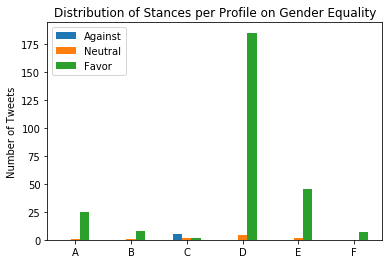

In [19]:
df_gen.plot(kind='bar', title='Distribution of Stances per Profile on Gender Equality', rot=0)

plt.ylabel('Number of Tweets')
plt.xticks(np.arange(len(users)), users)
plt.legend(loc='upper left')

with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/img/{experiment_name}_gen.eps', 'wb') as f:
    plt.savefig(f, format='eps')

In [20]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data/{experiment_name}_gen.tex', 'w') as f:
    df_gen.to_latex(f)

# Conservatism

In [21]:
df_con = pd.DataFrame.from_dict(
    {
        user_id: {
            'Against': stance_dict[user_id]['Conservatism'][0],
            'Neutral': stance_dict[user_id]['Conservatism'][1],
            'Favor': stance_dict[user_id]['Conservatism'][2]
        }
        for user_id in profile_ids
    },
    orient='index'
)

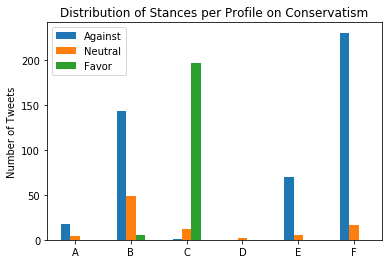

In [22]:
df_con.plot(kind='bar', title='Distribution of Stances per Profile on Conservatism', rot=0)

plt.ylabel('Number of Tweets')
plt.xticks(np.arange(len(users)), users)
plt.legend(loc='upper left')

with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/img/{experiment_name}_con.eps', 'wb') as f:
    plt.savefig(f, format='eps')

In [23]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data/{experiment_name}_con.tex', 'w') as f:
    df_con.to_latex(f)